In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt




In [8]:
#On récupère le dataset  pour le cancer des seins

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()




Quels sont des clés de ce dataset?

In [9]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Affichez la clé 'DESCR' pour avoir des informations sur ce dataset

In [10]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

Quelle est  la taille de la matrice de données (data)

In [11]:
cancer.data.shape

(569, 30)

Quels  sont des attributs (features)

In [12]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Quelles sont des étiquettes?

In [8]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

Comment les étiquettes sont représentées

In [13]:
set(cancer.target)

{np.int32(0), np.int32(1)}

Afficher  les 5ème et 6ème données de ce dataset 

Quels sont les "mean perimetre" de ces données?

Quelles sont les étiquettes pour ces données?

In [14]:
X = cancer.data
y = cancer.target
X[4:6], y[4:6]

feature_index = list(cancer.feature_names).index('mean perimeter')
X[4:6, feature_index]



array([135.1 ,  82.57])

Partitionez le dataset pour avoir X_train, y_train X_test, y_test

%75 pour l'ensemble d'apprentissage, %25 pour l'ensemble de test

mettez random_state=42 pour avoir tous les mêmes valeurs

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


Importez  la méthode du k plus proche voisins



In [16]:
from sklearn.neighbors import KNeighborsClassifier


Construisez  le modèle pour le nombre de voisin=1 et pour l'ensemble d'apprentissage



In [17]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)


,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Affichez le score pour l'ensemble de test

In [19]:
knn1.score(X_test, y_test)


0.9300699300699301

In [20]:
xnew= [1.6e+01, 1.674e+01, 9.873e+01, 6.894e+02, 9.883e-02, 1.364e-01,
       7.721e-02, 6.142e-02, 1.668e-01, 6.869e-02, 3.720e-01, 8.423e-01,
       2.304e+00, 3.484e+01, 4.123e-03, 1.819e-02, 1.996e-02, 1.004e-02,
       1.055e-02, 3.237e-03, 1.676e+01, 2.043e+01, 1.097e+02, 8.569e+02,
       1.2e-01, 3e-01, 1.856e-01, 1.018e-01, 2.2e-01, 8.8e-02]


Quelle est l'étiquette pour la nouvelle donnée





Nous essayons de dessiner le score de X_test pour le dataset cancer  pour différentes valeurs de k=2 ..10

Les résultats sont différents ou non, si on change le nombre de voisins?


In [24]:
xnew = np.array(xnew).reshape(1, -1)
knn1.predict(xnew)


    
    

array([1])

Utiliser la méthode cross-validation pour trouver le meilleur modèle (estimateur)

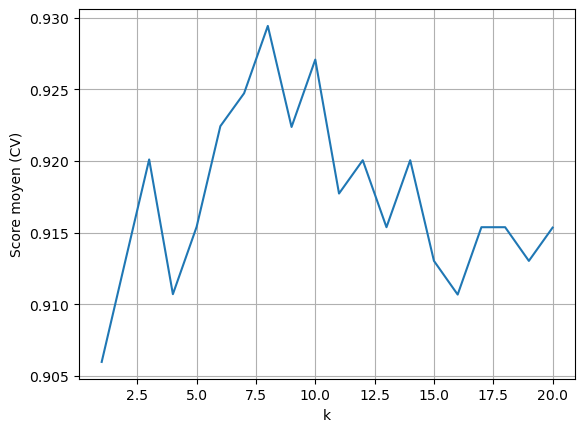

In [25]:
from sklearn.model_selection import cross_val_score

k_range = range(1, 21)
cv_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    cv_scores.append(scores.mean())

plt.plot(k_range, cv_scores)
plt.xlabel("k")
plt.ylabel("Score moyen (CV)")
plt.grid()
plt.show()


Affichez la matrice de confusion pour ce modèle

In [26]:
from sklearn.metrics import confusion_matrix

best_k = k_range[cv_scores.index(max(cv_scores))]
best_model = KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(X_train, y_train)

confusion_matrix(y_test, best_model.predict(X_test))


array([[50,  4],
       [ 2, 87]], dtype=int64)

**A faire après CM 2**

Prétraitement de données (Effet de "Scaling")

https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler

Lisez la partie concernant la partie prétraitement

Faites les mêmes exercices (dessinez les scores pour différents nombres de voisins)

pour les données prétraitées avec StandardScaler et MinMaxScaler


Les résultats sont ils  différents ou non?


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
